In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib


[nltk_data] Downloading package punkt to C:\Users\Jay
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jay
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__1. Data Loading__

In [8]:
df = pd.read_csv(r"C:\Users\Jay Patel\OneDrive\Desktop\CampusX\ML\Projects\SMS Spam Classifier\data\UCI_ML\Spam.csv",encoding="ISO-8859-1")

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


__2. Data Cleaning__

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Dropping Unnamed: 2, 3 and 4 as more than 90% of the values in these columns are Nulls

df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace = True)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace= True)

In [16]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
df_missing_prct = (df.isnull().sum() / df.shape[0]) * 100
df_missing_prct.reset_index()

,index,0
0,Target,0.0
1,Text,0.0


__3. Feature Engineering__

"""Counting the Number of Characters in Each SMS"""

In [18]:
df['num_character'] = df['Text'].apply(len)

"""Counting the Number of Words in Each SMS"""
    

In [19]:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

"""Counting the Number of Sentences in Each SMS"""
    

In [20]:
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [21]:
df.describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


__4. EDA__

In [22]:
spam_ham_dist = df['Target'].value_counts().reset_index()
spam_ham_dist

,index,Target
0,ham,4516
1,spam,653


In [23]:
df[df['Target']=='ham'][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['Target']=='spam'][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Key Observations:

__1. Ham Messages (Non-Spam)__

Count: 4,516 messages

__Mean (Average):__

num_character: 70.46 (ham messages tend to be shorter in character count)

num_words: 17.12 (on average, ham messages contain fewer words)

num_sentences: 1.82 (usually consists of a single short sentence)

__Max Values:__

num_character: 910 (some non-spam messages can be long, but most are short)

num_words: 220 (a few messages have many words, but most do not)

num_sentences: 38 (some messages are lengthy with multiple sentences)

__2. Spam Messages__

Count: 653 messages

__Mean (Average):__

num_character: 137.89 (spam messages tend to be longer)

num_words: 27.67 (spam messages contain more words on average)

num_sentences: 2.97 (spam messages have more sentences than ham)

__Max Values:__

num_character: 224 (spam messages are consistently longer, but not excessively so)

num_words: 46

num_sentences: 9

__Comparison & Insights__

Spam messages tend to be longer in terms of both character and word count compared to ham messages. Ham messages are shorter and often have fewer sentences, suggesting they are more direct and concise. The standard deviation is higher for spam messages, indicating greater variation in length.

25%, 50%, and 75% percentiles show that ham messages are more likely to be much shorter, whereas spam messages tend to be longer on average.

__Conclusion__

Spam messages typically contain more words, more sentences, and a higher character count, which might be a distinguishing factor for classification. Ham messages are generally shorter and more concise.

In [25]:
class_counts = df['Target'].value_counts().reset_index()
class_counts.columns = ['Target', 'Count']
    
# Compute percentage distribution
class_counts['Percentage'] = (class_counts['Count'] / df.shape[0]) * 100
class_counts['Percentage'] = class_counts['Percentage'].round(2).astype(str) + "%"  # Format percentage

# Create bar chart with percentage as text
fig = px.bar(data_frame=class_counts, x='Target', y='Count', text='Percentage')
fig.update_layout(title="Spam-Ham Class Distribution")

__Distribution of the Features__

In [26]:
spam_df = df[df['Target'] == 'spam']
spam_df

,Target,Text,num_character,num_words,num_sentences
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,spam,WINNER!! As a valued network customer you have...,158,32,5
9,spam,Had your mobile 11 months or more? U R entitle...,154,31,3
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [27]:
# Select only spam messages
spam_df = df[df['Target'] == 'spam']

# Define features for distribution plots
features = ['num_character', 'num_words', 'num_sentences']

# Create KDE-like distribution plots
fig = make_subplots(rows=1, cols=3, subplot_titles=features)

for i, feature in enumerate(features):
    hist_data = [spam_df[feature]]  # Data for the KDE plot
    group_labels = [feature]  # Label for the legend    
    # Create KDE-like distribution
    kde_fig = ff.create_distplot(hist_data, group_labels, show_hist=True, show_rug=False)
    # Extract KDE trace and add it to subplot
    for trace in kde_fig['data']:
        fig.add_trace(trace, row=1, col=i+1)

# Update layout
fig.update_layout(title_text="KDE Approximation for Spam Messages", showlegend=False, width=1200, height=400)
fig.show()

num_character: The distribution is right-skewed, meaning most messages are short (50-100 characters), but some extend beyond 800 characters.

num_words: Most ham messages contain less than 50 words, but a significant proportion has only 5-20 words.

num_sentences: The majority of ham messages have 1-4 sentences, with a sharp drop-off after that.

__Key Observations for Ham Messages:__

The distribution is highly right-skewed, meaning ham messages are often short and concise.

Unlike spam messages, some ham messages are extremely long (e.g., over 800 characters), possibly representing longer conversations or emails.

The higher peak at low values suggests that most ham messages are very short and to the point, unlike spam messages, which are usually longer.

In [28]:
# Select only spam messages
spam_df = df[df['Target'] == 'ham']

# Define features for distribution plots
features = ['num_character', 'num_words', 'num_sentences']

# Create KDE-like distribution plots
fig = make_subplots(rows=1, cols=3, subplot_titles=features)

for i, feature in enumerate(features):
    hist_data = [spam_df[feature]]  # Data for the KDE plot
    group_labels = [feature]  # Label for the legend    
    # Create KDE-like distribution
    kde_fig = ff.create_distplot(hist_data, group_labels, show_hist=True, show_rug=False)
    # Extract KDE trace and add it to subplot
    for trace in kde_fig['data']:
        fig.add_trace(trace, row=1, col=i+1)

# Update layout
fig.update_layout(title_text="KDE Approximation for ham Messages", showlegend=False, width=1200, height=400)
fig.show()

num_character: Most spam messages contain 100-200 characters, with a peak around 150 characters.

num_words: Spam messages usually contain 20-40 words, with the highest density around 30 words.

num_sentences: Most spam messages have 2-4 sentences, but some extend beyond 6-8 sentences.

__Key Observations for Spam Messages:__

Spam messages are often longer, typically containing more characters and words.

The KDE plot shows a smooth distribution, meaning spam messages have a relatively consistent structure in terms of length.

The peak around 30 words suggests that spam messages are often structured to be concise but informative, possibly to avoid detection by spam filters.

__Conclusions:__

Spam messages tend to be longer than ham messages in terms of character and word count.

Spam messages are structured with multiple sentences, while ham messages tend to be shorter and concise.

Ham messages have more variation, with some being very short and others extremely long, unlike spam messages that follow a more uniform structure.

The KDE plots highlight clear statistical differences between spam and ham messages, which can be useful for spam detection models.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



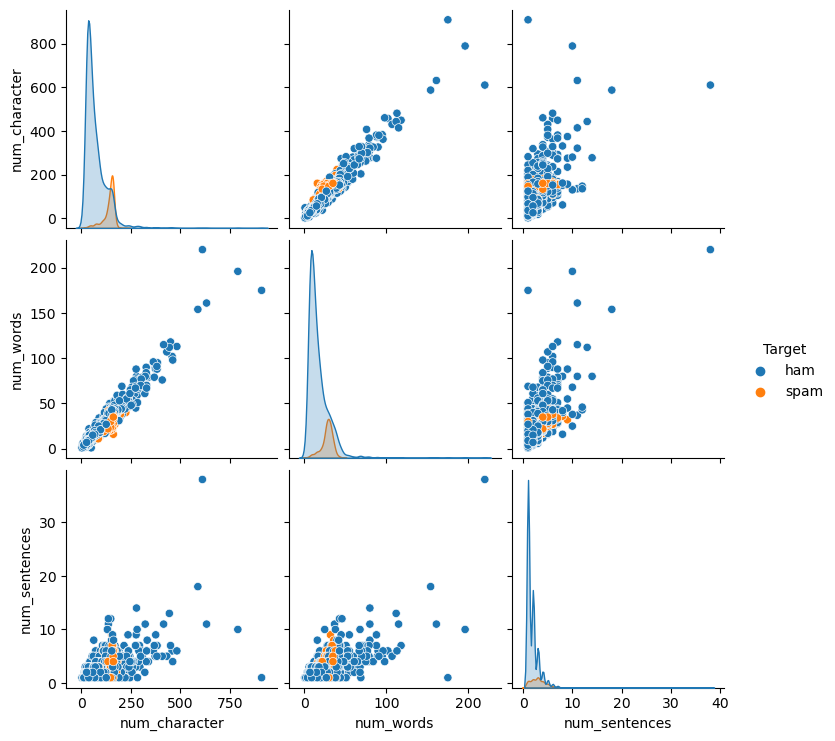

In [29]:
sns.pairplot(df, hue='Target')

In [30]:
fig = px.scatter_matrix(df,
                            dimensions=["num_character", "num_words", "num_sentences"],
                            color="Target",  
                            title="Pairwise Scatter Matrix of Features",
                            )
fig.update_layout(width=1000, height=800)

c:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [31]:
corr_matrix = df.corr()  # Compute the correlation matrix
fig = px.imshow(corr_matrix, 
                    color_continuous_scale='RdBu_r', 
                    title="Correlation Heatmap",
                    labels=dict(x="Features", y="Features"))  
    
fig.update_layout(width=800, height=600)  
fig.show()

C:\Users\Jay Patel\AppData\Local\Temp\ipykernel_6928\2609092693.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



__5. Data Pre-Processing (Text Pre-Processing)__

1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and Punctuation
5. Stemming

In [32]:
def transform_text(text):
    text = text.lower()  # Lower Case Conversion
    text = nltk.word_tokenize(text) # Tokenization
    y= []  # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [33]:
transform_text("Hi How Are You %% @?")

['hi', 'how', 'are', 'you']

__Stopwords__

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Jay
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
 # Final Function for text pre-processing

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()

    # Step 2: Tokenization
    tokens = word_tokenize(text)

    # Step 3: Remove special characters and numbers
    tokens = [word for word in tokens if word.isalnum()]

    # Step 4: Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Step 5: Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Return processed text as a single string
    processed_text = " ".join(tokens)
    return processed_text 


[nltk_data] Downloading package punkt to C:\Users\Jay
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jay
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['Processed_Text'] = df['Text'].apply(transform_text)

In [38]:
df['Processed_Text'].isnull().sum()

0

In [39]:
empty_count = (df['Processed_Text'] == "").sum()
print(f"Number of empty strings: {empty_count}")


Number of empty strings: 9


In [40]:
df['Processed_Text'] = df['Processed_Text'].apply(lambda x: np.nan if x == "" else x)

In [41]:
empty_count = (df['Processed_Text'] == "").sum()
print(f"Number of empty strings: {empty_count}")

Number of empty strings: 0


In [42]:
df.dropna(subset=['Processed_Text'], inplace= True)

In [43]:
def transform_target(df, target_column='Target'):
    """Transforms the target column: 'ham' → 0, 'spam' → 1."""
    if target_column in df.columns:
        df[target_column] = df[target_column].map({'ham': 0, 'spam': 1})
        return df
    else:
        raise ValueError(f"Column '{target_column}' not found in the DataFrame.")

In [44]:
transform_target(df)

,Target,Text,num_character,num_words,num_sentences,Processed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [45]:
df.sample(5)

,Target,Text,num_character,num_words,num_sentences,Processed_Text
3208,0,Havent mus ask if u can 1st wat. Of meet 4 lun...,134,37,3,havent mu ask u 1st wat meet 4 lunch den u n m...
3640,1,You can stop further club tones by replying \S...,128,24,4,stop club tone repli see html term club tone c...
4989,1,Phony å£350 award - Todays Voda numbers ending...,177,32,2,phoni award today voda number end xxxx select ...
2014,0,Ambrith..madurai..met u in arun dha marrge..re...,52,13,1,ambrith madurai met u arun dha marrg remembr
2309,0,"I have 2 sleeping bags, 1 blanket and paper an...",78,17,2,2 sleep bag 1 blanket paper phone detail anyth...


In [46]:

from collections import Counter

spam_words = " ".join(df[df['Target'] == 1]['Processed_Text'])
word_freq = Counter(spam_words.split())

word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False).head(30)

fig = px.scatter(
    word_freq_df, x=range(len(word_freq_df)), y="Frequency",
    size="Frequency", text="Word",
    title="Spam Messages Word Cloud",
    labels={'x': "Words (index)", 'y': "Frequency"}
)

fig.update_traces(textposition='top center', textfont_size=12)
fig.update_xaxes(showticklabels=False)
fig.update_layout(
    xaxis=dict(tickangle=-45),  # Rotate labels for better readability
    height=700, width=1200,  # Increase figure size
    margin=dict(l=50, r=50, t=50, b=100)  # Adjust margins
)

# Show the plot
fig.show()


In [47]:

from collections import Counter

spam_words = " ".join(df[df['Target'] == 0]['Processed_Text'])
word_freq = Counter(spam_words.split())

word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False).head(30)

fig = px.scatter(
    word_freq_df, x=range(len(word_freq_df)), y="Frequency",
    size="Frequency", text="Word",
    title="Ham Messages Word Cloud",
    labels={'x': "Words (index)", 'y': "Frequency"}
)

fig.update_traces(textposition='top center', textfont_size=12)
fig.update_xaxes(showticklabels=False)
fig.update_layout(
    xaxis=dict(tickangle=-45),  # Rotate labels for better readability
    height=700, width=1200,  # Increase figure size
    margin=dict(l=50, r=50, t=50, b=100)  # Adjust margins
)

# Show the plot
fig.show()


4. Model Building

In [48]:
df

,Target,Text,num_character,num_words,num_sentences,Processed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [49]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(df['Processed_Text']).toarray()
X_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
X_vectorized.shape

(5160, 6708)

In [51]:
y = df['Target'].values
y.shape

(5160,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [53]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    """Trains a given model and returns its evaluation metrics for both train & test sets."""
    
    model.fit(X_train, y_train)

    # Predictions on Train & Test Set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        "Model": model_name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Train Recall": recall_score(y_train, y_train_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Train F1-Score": f1_score(y_train, y_train_pred),
        "Test F1-Score": f1_score(y_test, y_test_pred),
    }

   

    return metrics, model 

In [54]:
naive_bayes_model = MultinomialNB(alpha=3, fit_prior=True)
base_results, nb_model = train_and_evaluate(naive_bayes_model, X_train, X_test, y_train, y_test, "Naïve Bayes")
print(base_results)

{'Model': 'Naïve Bayes', 'Train Accuracy': 0.9876453488372093, 'Test Accuracy': 0.9699612403100775, 'Train Precision': 0.9877800407331976, 'Test Precision': 0.9035087719298246, 'Train Recall': 0.9150943396226415, 'Test Recall': 0.8373983739837398, 'Train F1-Score': 0.9500489715964741, 'Test F1-Score': 0.869198312236287}


In [55]:
models = {
            "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
            "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

In [56]:
performance_results = [base_results] # Start with Naïve Bayes results
trained_models = {"Naïve Bayes": nb_model}  # Dictionary to store trained models        

In [57]:
for name, model in models.items():
            metrics, trained_model = train_and_evaluate(model, X_train, X_test, y_train, y_test, name)
            performance_results.append(metrics)
            trained_models[name] = trained_model  # Store trained model

In [59]:
 # Convert results to DataFrame
performance_df = pd.DataFrame(performance_results).sort_values(by=["Test F1-Score", "Test Precision", "Test Recall"], ascending=[False, False, False])


In [60]:
print("\n Model Performance Comparison:\n")
performance_df


 Model Performance Comparison:



,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
1,Random Forest,1.000000,0.972868,1.000000,0.989691,1.000000,0.780488,1.000000,0.872727
0,Naïve Bayes,0.987645,0.969961,0.987780,0.903509,0.915094,0.837398,0.950049,0.869198
2,Gradient Boosting,0.974079,0.963178,0.995316,0.938144,0.801887,0.739837,0.888192,0.827273
